### Installing libraries

In [34]:
import pandas as pd
import numpy as np

### Data overview

In [35]:
data = pd.read_csv('data/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [37]:
from collections import Counter

Counter(data.sentiment)

Counter({'positive': 25000, 'negative': 25000})

### Data preprocessing and separating the target from feature

In [38]:
data.sentiment = data.sentiment.apply(lambda x: 1 if x == 'positive' else 0)

X_initial, y = data.review.to_list(), data.sentiment.to_list()

In [39]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Артур\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
def remove_stopwords(sentence):
    # Split the sentence into individual words 
    words = sentence.split() 

    # Use a list comprehension to remove stop words 
    filtered_words = [word for word in words if word not in stopwords.words('english')] 

    # Join the filtered words back into a sentence 
    return ' '.join(filtered_words)

In [41]:
corpus = [remove_stopwords(x) for x in X_initial]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

### Model training

#### Baseline

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [47]:
from sklearn.ensemble import RandomForestClassifier

baseline = RandomForestClassifier()
baseline.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = baseline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')

Accuracy: 85.52%


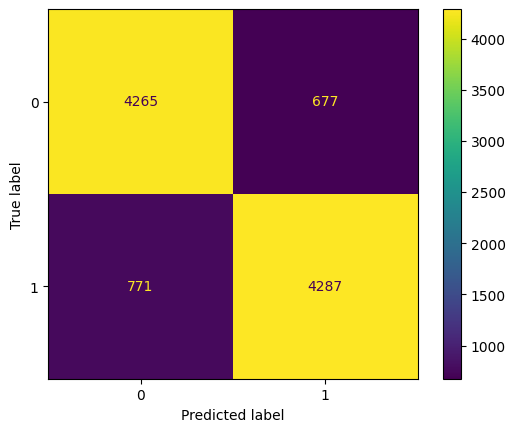

In [52]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [53]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 8, 10],
    'bootstrap': [True, False]
}

In [54]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring='accuracy')
results = grid_cv.fit(X_train, y_train)

In [56]:
results.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=300)

In [58]:
model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10, n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=300)

In [59]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')

Accuracy: 84.69%


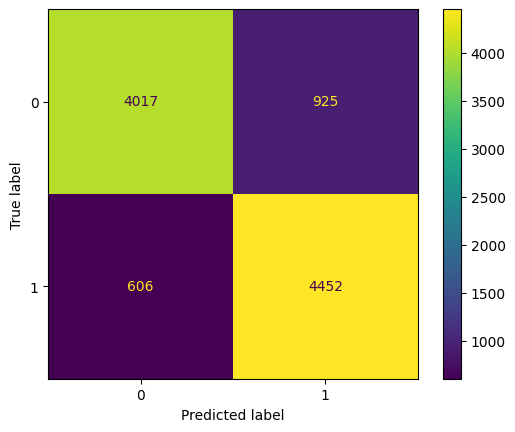

In [60]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Conclusion
- From this research I can say that default CountVectorizer with RandomForestClassifier gives a pretty good accuracy of about 85%.
- Tuned model isn't signifficantly different from the baseline, but it gives more errors when predicting positive cases and less errors when predicting negatives, so we need to understand buisiness problem to choose correct hyperparameters. 